<a href="https://colab.research.google.com/github/YeonJaeHong/ecc-/blob/main/%EB%8D%B0%EB%B6%842%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CHAP 4. 데이터 요약하기**

  > 4-1. 통계로 요약하기

기술통계: 자료의 내용을 압축하여 설명하는 방법

In [ ]:
import gdown
gdown.download('https://bit.ly/3736JW1','ns_book6.csv',quiet=False)

Downloading...
From: https://bit.ly/3736JW1
To: /content/ns_book6.csv
100%|██████████| 55.0M/55.0M [00:01<00:00, 45.6MB/s]


'ns_book6.csv'

In [ ]:
#다운로드한 파일을 데이터프레임으로 불러온후 처음 다섯행을 출력하는 코드
import pandas as pd
ns_book6= pd.read_csv('ns_book6.csv',low_memory=False)
ns_book6.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021.0,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021.0,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021.0,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021.0,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021.0,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [ ]:
#판다스의 describe() method는 기본적인 기술통계를 자동으로 출력
ns_book6.describe()

,번호,발행년도,도서권수,대출건수
count,379976.000000,379976.000000,379976.000000,379976.000000
mean,201726.332847,2008.516306,1.135874,11.504629
std,115836.454596,8.780529,0.483343,19.241926
min,1.000000,1947.000000,0.000000,0.000000
25%,102202.750000,2003.000000,1.000000,2.000000
50%,203179.500000,2009.000000,1.000000,6.000000
75%,301630.250000,2015.000000,1.000000,14.000000
max,401681.000000,2650.000000,40.000000,1765.000000


In [ ]:
#count: 누락된 값을 제외한 데이터개수를 나타냄 여기서 질문: **누락된 것이라는 건 값이 없는 데이터인가?**
#mean: 평균
#std: 표준편차
#min: 최솟값
#50%: 중앙값
#25%,75%: 순서대로 값을 줄세웠을때, 25%, 75%사이 지점에 놓인 값
#max: 최댓값

#-> 위의 데이터의 도서권수 최솟값이 0은 이상한 데이터!

** 질문? describe() 에서는 25,75%를 보여준다고 했는데 위엔 50%도 있음??**  -> 50%는 중앙값으로 나온것!

In [ ]:
#도서권수 열의 값이 0인 행의 개수 세기: sum과 boolean
sum(ns_book6['도서권수']==0)


3206

In [ ]:
#도서권수가 0인것은 의미가 없기에 제외하는 코드
ns_book7= ns_book6[ns_book6['도서권수']>0]

In [ ]:
#describe() method는 25%,75%를 보여주는데 percentiles 매개변수에 위치를 지정하면 다른 위치도 볼 수 있음
ns_book7.describe(percentiles=[0.3,0.6,0.9]) #30%,60%,90%에 위치한 값


,번호,발행년도,도서권수,대출건수
count,376770.000000,376770.000000,376770.000000,376770.000000
mean,202977.476649,2008.460076,1.145540,11.593439
std,115298.245784,8.773148,0.473853,19.279409
min,1.000000,1947.000000,1.000000,0.000000
30%,124649.700000,2004.000000,1.000000,2.000000
50%,204550.500000,2009.000000,1.000000,6.000000
60%,243537.400000,2011.000000,1.000000,8.000000
90%,361341.100000,2018.000000,2.000000,28.000000
max,401681.000000,2650.000000,40.000000,1765.000000


In [ ]:
#수치가 아닌 다른 데이터타입의 기술통계를 보는 방법
ns_book7.describe(include='object')

#count= 누락된 값을 제외한 데이터개수
#unique= 고유한 값의 개수
#top:가장 많이 등장하는 값
#freq: top행에 등장하는 항목의 빈도수

,도서명,저자,출판사,ISBN,세트 ISBN,부가기호,권,주제분류번호,등록일자
count,376770,376770,376770,376770,55866,308252,61793,359792,376770
unique,336408,248850,21875,350810,14875,17,834,12467,4562
top,승정원일기,세종대왕기념사업회 [편],문학동네,9788937430299,9788937460005,0,1,813.6,1970-01-01
freq,250,303,4410,206,702,158235,13282,14816,28185


평균구하기

In [ ]:
#반복문 이용해서 수식으로 평균 구하기
x=[10,20,30]
sum=0
for i in range(3):
  sum+=x[i]
  print("평균:",sum/len(x))


  #파이썬의 range()함수 (0부터 시작)

평균: 3.3333333333333335
평균: 10.0
평균: 20.0


In [ ]:
# mean method
ns_book7['대출건수'].mean()

11.593438968070707

In [ ]:
#중앙값 구하기: median()

ns_book7['대출건수'].median()

6.0

In [ ]:
#데이터 개수가 짝수일때 중앙값
temp_df=pd.DataFrame([1,2,3,4])
temp_df.median()

0    2.5
dtype: float64

In [ ]:
#중복값 제거하고 중앙값 구하기
ns_book7['대출건수'].drop_duplicates().median()

183.0

In [ ]:
#최솟값, 최댓값 구하기
print (ns_book7['대출건수'].min())
print (ns_book7['대출건수'].max())

0
1765


In [ ]:
#분위수 구하기 : pandas에서는 quantile() method 사용 (4분위수)
ns_book6['대출건수'].quantile(0.25)

2.0

In [ ]:
ns_book6['대출건수'].quantile([0.25,0.5,0.75])


0.25     2.0
0.50     6.0
0.75    14.0
Name: 대출건수, dtype: float64

In [ ]:
#interpolation매개변수
import pandas as pd
pd.Series([1,2,3,4,5]).quantile(0.9,interpolation='midpoint')

4.5

In [ ]:
#nearest
pd.Series([1,2,3,4,5]).quantile(0.9,interpolation='nearest')

5

In [ ]:
#백분위 구하기 : 개수가 많을때 백분위 구하기
#대출건수의 열의 값이 10보다 작은지 비교하여 불리언 배열 만들기
borrow_10_flag = ns_book7['대출건수'] < 10

In [ ]:
borrow_10_flag.mean()
#불리언은 true=1,false=0으로 처리하므로 비율 알수 있음
#true의 개수를 센 다음 전체 데이터개수로 나누면 10보다 작은 대출건수의 비율 알 수 있음

0.6402712530190833

In [ ]:
ns_book7['대출건수'].quantile(0.65) #확인작업

10.0

In [ ]:
#분산 : var() method
ns_book7['대출건수'].var()

371.69563042906674

In [ ]:
#표준편차: std() method
ns_book6['대출건수'].std()
#-> 평균이 11인데 표준편차가 19이면 이상하다! 평균보다 훨씬 큰 데이커가 존재한다고 생각

19.241925726324574

In [ ]:
#최빈값 구하기 : mode() method
print(ns_book7['도서명'].mode()) #텍스트형
print(ns_book7['발행년도'].mode()) #수치형

0    승정원일기
Name: 도서명, dtype: object
0    2012.0
Name: 발행년도, dtype: float64


데이터 프레임에서 기술통계 구하기
>-> 수치형 열만 연산을 할 수 있기 때문에 해당열에서만 적용이 되도록 numeric_only 매개변수를 true 로 지정해야함

In [ ]:
ns_book7.mean(numeric_only=True) #수치형열만 연산!

번호      202977.476649
발행년도      2008.460076
도서권수         1.145540
대출건수        11.593439
dtype: float64

In [ ]:
#nb_book7의 번호열은 모두 고유한값. loc method 로 도서명열부터 마지막 열까지이 최빈값
ns_book7.loc[:,'도서명':].mode()

,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,승정원일기,세종대왕기념사업회 [편],문학동네,2012.0,9788937430299,9788937460005,0,1,813.6,1,0,1970-01-01


In [ ]:
ns_book7.to_csv('ns_book7.csv', index=False)

**넘파이 기술통계**

In [ ]:
#평균
import numpy as np
np.mean(ns_book7['대출건수'])

11.593438968070707

In [ ]:
#가중평균 여기선 가중평균이 1
np.average(ns_book7['대출건수'], weights=1/ns_book7['도서권수'])

10.543612175385386

In [ ]:
ns_book7['대출건수'].sum()/ns_book7['도서권수'].sum()

10.120503701300958

In [ ]:
#중앙값
np.median(ns_book7['대출건수'])

6.0

In [ ]:
#최소,최댓
np.min(ns_book7['대출건수'])

0

In [ ]:
np.max(ns_book7['대출건수'])

1765

In [ ]:
#분위수 구하기
np.quantile(ns_book7['대출건수'], [0.25,0.5,0.75])

array([ 2.,  6., 14.])

In [ ]:
#분산
#판다스에서는 N-1을 분모로 나누는 표본집단의 분산을 구하는 식을 사용 그래서 넘파이의 VAR() 함수와 달라서 자유도 ddof를 지정해주어야함
np.var(ns_book7['대출건수'])

371.6946438971496

In [ ]:
ns_book7['대출건수'].var(ddof=0) #n으로 나누기

371.6946438971496

In [ ]:
np.var(ns_book7['대출건수'], ddof=1) #n-1로 나누기

371.69563042906674

In [ ]:
#표준편차
np.std(ns_book7['대출건수'])

19.27938390865096

In [ ]:
#최빈값 :직접적인 값을 계산하는 함수 없음
# unique() 함수로 구할 수 있음
#unique 함수를 호출해서 고유한 값과 등장 횟수배열을 읽음
values, counts = np.unique(ns_book7['도서명'], return_counts=True)
#counts 에서 가장 큰 인덱스값 찾음 ; argmax() use
max_idx = np.argmax(counts)
#해당 값 출력
values[max_idx]

'승정원일기'

**4-2. 분포 요약하기**

산점도 그리기

특성과 변수
산점도를 그릴때에는 mathplot을 사용한다

In [ ]:
#데이터 불러오기
import gdown

gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)

Downloading...
From: https://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 133MB/s]


'ns_book7.csv'

In [ ]:
import pandas as pd

ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


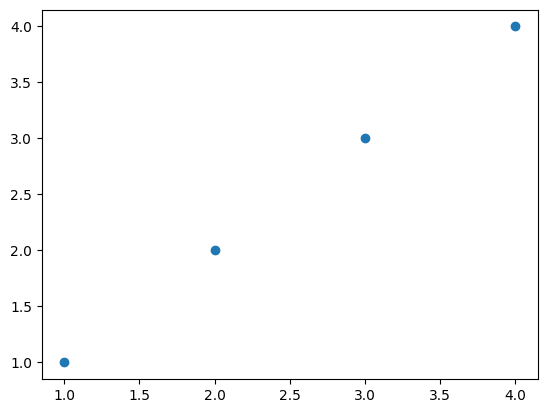

In [ ]:
#본격적인 그리기
import matplotlib.pyplot as plt

plt.scatter([1,2,3,4], [1,2,3,4]) #산점도는 platter 함수로 그린다 앞이 x축 좌표, 뒤가 y축 좌표
plt.show()  #함수 출력


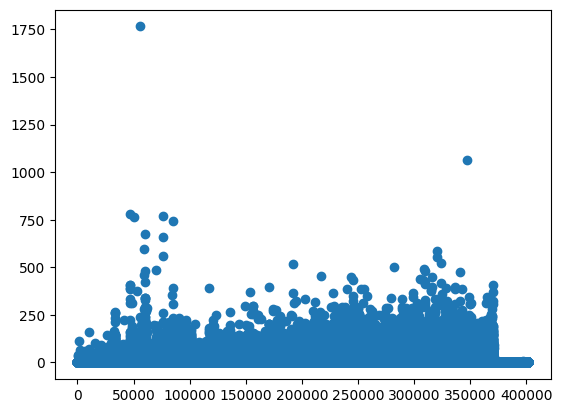

In [ ]:
plt.scatter(ns_book7['번호'], ns_book7['대출건수']) #번호열의 값을 x축, 대출건수 열의 값을 y축
plt.show()
#최신 버전에서는 show()없이도 보여진다고 한다

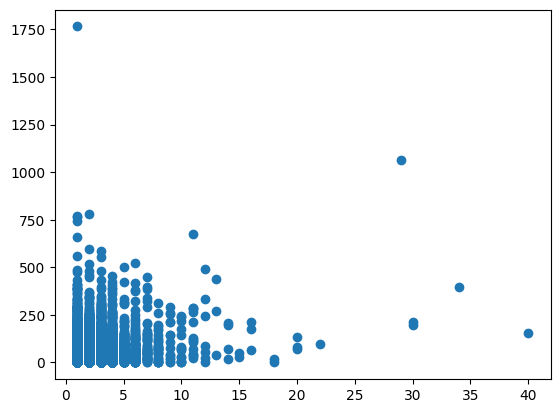

In [ ]:
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'])
plt.show()

In [ ]:
#중첩되는 값을 보기 위해 투명도 조절 ; alpha 매개변수 사용 (0~1 사이값)

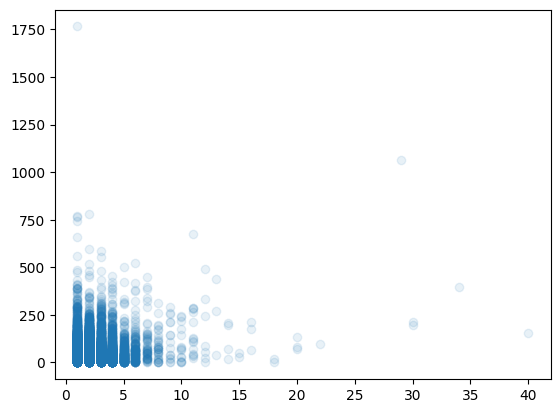

In [ ]:
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1) #매개변수를 0.1로 지정
plt.show()

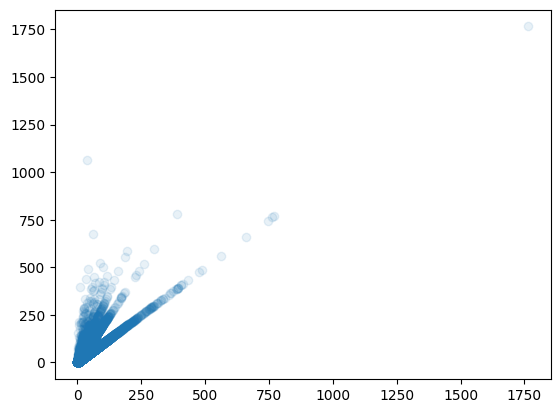

In [ ]:
average_borrows = ns_book7['대출건수']/ns_book7['도서권수']
plt.scatter(average_borrows, ns_book7['대출건수'], alpha=0.1)
plt.show()